In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/nytimes/covid-19-data/blob/master/us-counties-2020.csv?raw=true'
df = pd.read_csv(url)

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df_first_wave = df[df['date'] < '06/30/2020']

In [5]:
treatment_states = ['Minnesota', 'Montana','Nevada','North Carolina','Rhode Island', 'Alabama','Arizona','Florida','Georgia','Kansas','Maine','Maryland','Mississippi','Missouri','New Hampshire','South Carolina','Tennesse','Texas','Utah','Virgina']

In [6]:
control_states = ['Arkansas','Iowa','Nebraska','North Dakota','Oklahoma', 'South Dakota', 'Wyoming']

In [7]:
treatment_df = df_first_wave[df_first_wave['state'].isin(treatment_states)]

In [8]:
control_df = df_first_wave[df_first_wave['state'].isin(control_states)]

In [9]:
control_df['Treatment'] = False

/tmp/ipykernel_18176/1425731934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_df['Treatment'] = False


In [10]:
treatment_df['Treatment'] = True

/tmp/ipykernel_18176/283517631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treatment_df['Treatment'] = True


In [11]:
combined_df = pd.concat([control_df, treatment_df])

## Dropping values where 'county' is 'Unknown' as there is no way to impute. Losing 1157 records of 150050 initial total (0.77%)

In [12]:
#drop unknown county
combined_df = combined_df[combined_df['county'] != 'Unknown']

## Drop records where the 'county' is the same as the 'state.' These are considered to be state-wide counts of deaths and cases. Dropping 440 of 148893 current total of records (0.2%)

In [13]:
combined_df[combined_df['county'] == combined_df['state']]

,date,county,state,fips,cases,deaths,Treatment
1834,2020-03-13,Oklahoma,Oklahoma,40109.0,1,0.0,False
2195,2020-03-14,Oklahoma,Oklahoma,40109.0,1,0.0,False
2613,2020-03-15,Oklahoma,Oklahoma,40109.0,1,0.0,False
3077,2020-03-16,Oklahoma,Oklahoma,40109.0,2,0.0,False
3604,2020-03-17,Oklahoma,Oklahoma,40109.0,6,0.0,False
...,...,...,...,...,...,...,...
274149,2020-06-25,Utah,Utah,49049.0,3541,22.0,True
277297,2020-06-26,Utah,Utah,49049.0,3675,22.0,True
280445,2020-06-27,Utah,Utah,49049.0,3751,22.0,True
283591,2020-06-28,Utah,Utah,49049.0,3850,22.0,True


In [14]:
#drop where state == county
combined_df = combined_df[combined_df['county'] != combined_df['state']]
combined_df


,date,county,state,fips,cases,deaths,Treatment
198,2020-02-17,Douglas,Nebraska,31055.0,10,0.0,False
210,2020-02-18,Douglas,Nebraska,31055.0,10,0.0,False
222,2020-02-19,Douglas,Nebraska,31055.0,10,0.0,False
235,2020-02-20,Douglas,Nebraska,31055.0,11,0.0,False
249,2020-02-21,Douglas,Nebraska,31055.0,11,0.0,False
...,...,...,...,...,...,...,...
286734,2020-06-29,Tooele,Utah,49045.0,234,0.0,True
286735,2020-06-29,Uintah,Utah,49047.0,30,0.0,True
286738,2020-06-29,Wasatch,Utah,49051.0,406,3.0,True
286739,2020-06-29,Washington,Utah,49053.0,1156,0.0,True


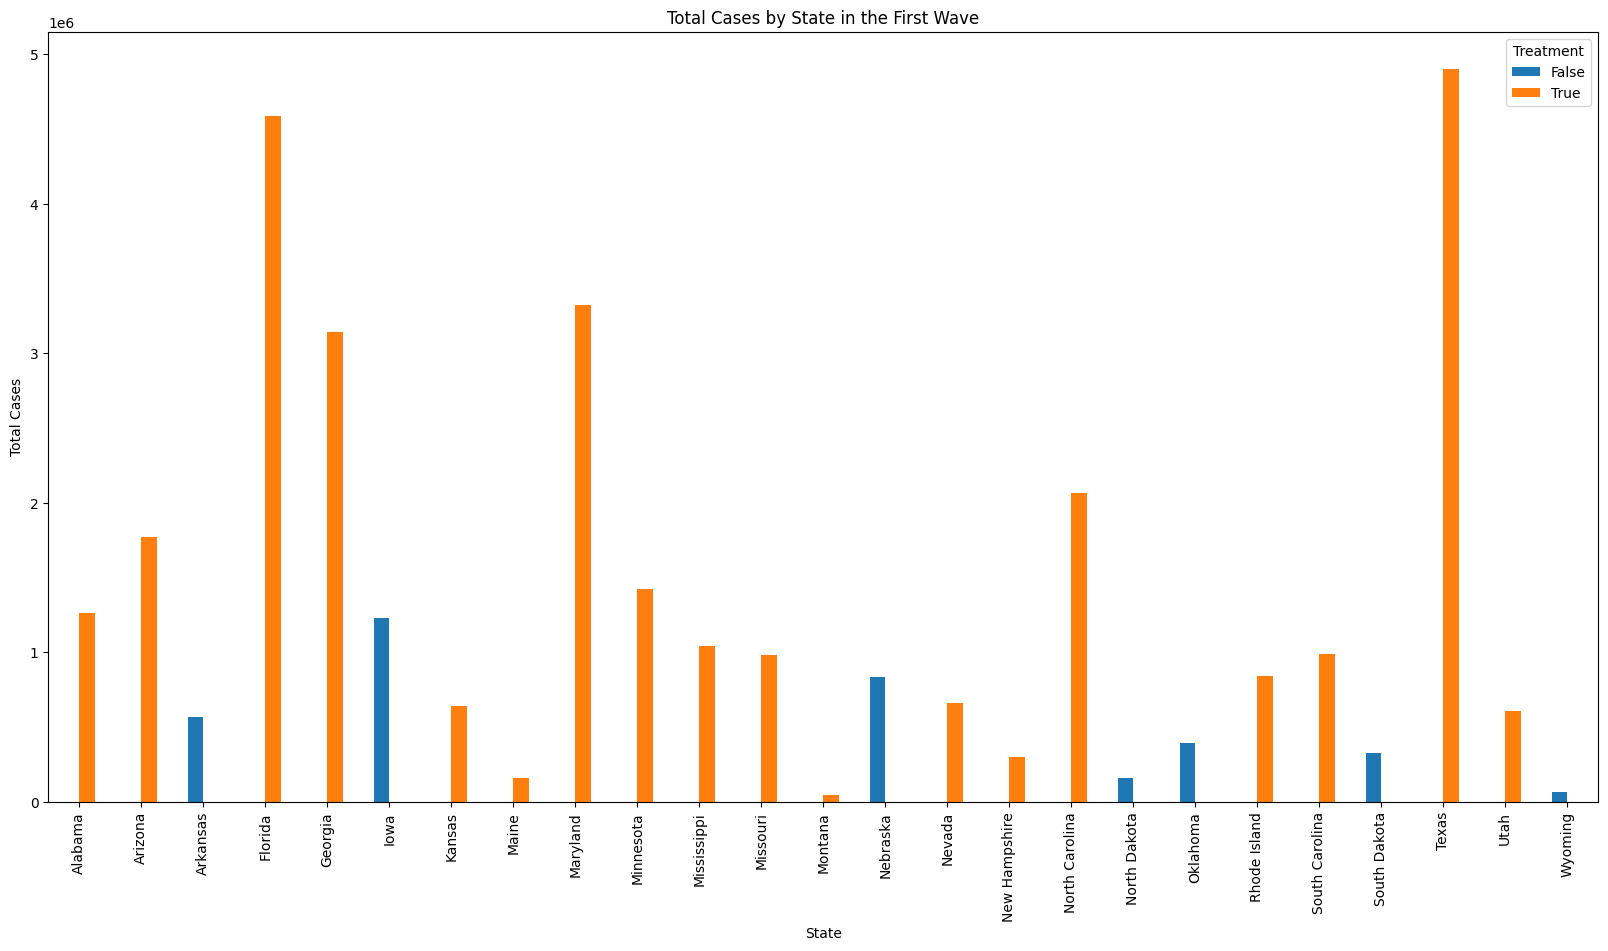

In [15]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['cases'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Cases by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.show()


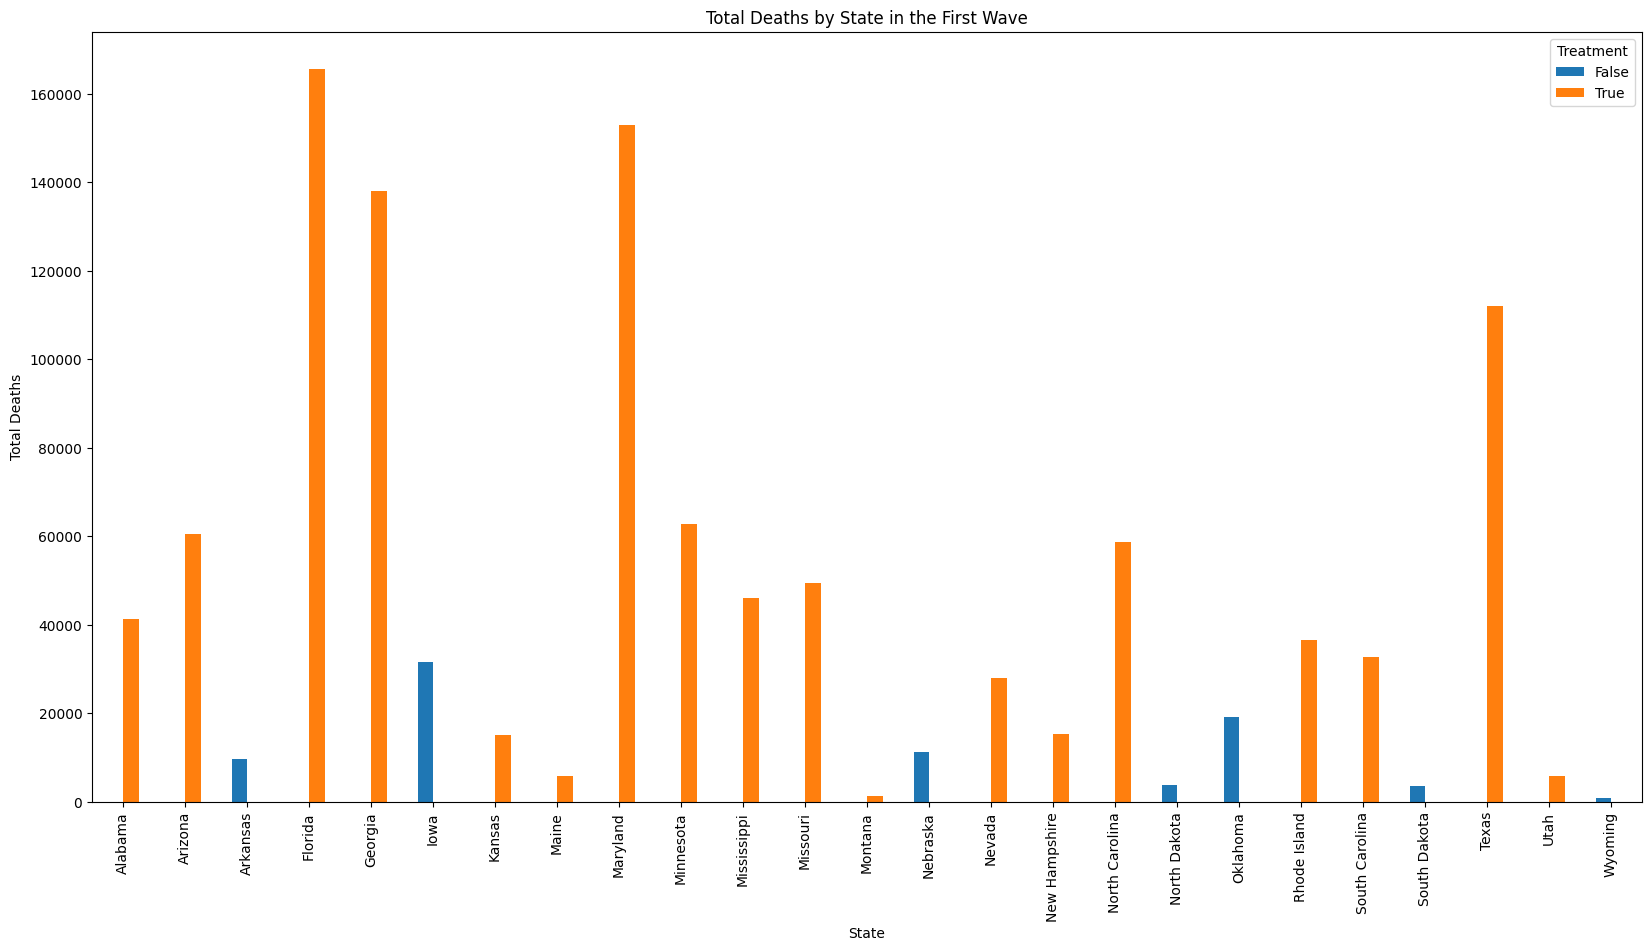

In [16]:
#plot sum of cases per state by treatment in a bar graph
combined_df.groupby(['state', 'Treatment'])['deaths'].sum().unstack().plot(kind='bar', figsize=(20,10))
plt.title('Total Deaths by State in the First Wave')
plt.xlabel('State')
plt.ylabel('Total Deaths')
plt.show()

In [17]:
import pandas as pd


df_new = combined_df.groupby(['state', 'county', 'Treatment']).apply(
    lambda x: pd.DataFrame({
        'date': pd.date_range(start='2020-01-01', end=x['date'].max(), freq='D'),
        'state': x['state'].iloc[0],
        'county': x['county'].iloc[0],
        'Treatment': x['Treatment'].iloc[0]
    })
).reset_index(drop=True)

combined_df = pd.merge(df_new, combined_df, on=['date', 'state', 'county', 'Treatment'], how='outer').fillna(0)



In [18]:
combined_df['state_and_county'] = combined_df['state'] + ' ' + combined_df['county']

In [19]:
#get list of unqiue state and county combinations
state_and_county_list = combined_df['state_and_county'].unique()

In [20]:
new_dataframe_please_work_2 = pd.DataFrame()

state_county_list = []
for state_county in state_and_county_list: 
    state_county_df = combined_df[combined_df['state_and_county'] == state_county]
    state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
    state_county_list.append(state_county_df)

df_with_deaths = pd.concat(state_county_list)

/tmp/ipykernel_18176/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
/tmp/ipykernel_18176/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['deaths_per_day'] = state_county_df.groupby(['state', 'county'])['deaths'].diff()
/tmp/ipykernel_18176/3463766317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [21]:
df_with_deaths = df_with_deaths[df_with_deaths['deaths_per_day'] >= 0]

In [24]:
state_county_list_cases = []
for state_county in state_and_county_list: 
    state_county_df = combined_df[combined_df['state_and_county'] == state_county]
    state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
    state_county_list_cases.append(state_county_df)

df_with_deaths_cases = pd.concat(state_county_list_cases)

df_with_deaths_cases = df_with_deaths_cases[df_with_deaths_cases['cases_per_day'] >= 0]

/tmp/ipykernel_18176/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
/tmp/ipykernel_18176/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_county_df['cases_per_day'] = state_county_df.groupby(['state', 'county'])['cases'].diff()
/tmp/ipykernel_18176/2837318528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [36]:
df_with_everything = pd.merge(df_with_deaths, df_with_deaths_cases, on=['date', 'state', 'county', 'Treatment'], how='right').fillna(0)

In [39]:
df_with_everything

,date,state,county,Treatment,fips_x,cases_x,deaths_x,state_and_county_x,deaths_per_day,fips_y,cases_y,deaths_y,state_and_county_y,cases_per_day
0,2020-01-02,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
1,2020-01-03,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
2,2020-01-04,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
3,2020-01-05,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
4,2020-01-06,Alabama,Autauga,True,0.0,0.0,0.0,Alabama Autauga,0.0,0.0,0.0,0.0,Alabama Autauga,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297328,2020-06-25,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
297329,2020-06-26,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
297330,2020-06-27,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0
297331,2020-06-28,Wyoming,Weston,False,56045.0,1.0,0.0,Wyoming Weston,0.0,56045.0,1.0,0.0,Wyoming Weston,0.0


In [45]:
df_final = df_with_everything[['date', 'state','cases_x', 'deaths_x', 'county','Treatment', 'fips_x', 'deaths_per_day', 'cases_per_day']]

In [46]:
df_final

,date,state,cases_x,deaths_x,county,Treatment,fips_x,deaths_per_day,cases_per_day
0,2020-01-02,Alabama,0.0,0.0,Autauga,True,0.0,0.0,0.0
1,2020-01-03,Alabama,0.0,0.0,Autauga,True,0.0,0.0,0.0
2,2020-01-04,Alabama,0.0,0.0,Autauga,True,0.0,0.0,0.0
3,2020-01-05,Alabama,0.0,0.0,Autauga,True,0.0,0.0,0.0
4,2020-01-06,Alabama,0.0,0.0,Autauga,True,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
297328,2020-06-25,Wyoming,1.0,0.0,Weston,False,56045.0,0.0,0.0
297329,2020-06-26,Wyoming,1.0,0.0,Weston,False,56045.0,0.0,0.0
297330,2020-06-27,Wyoming,1.0,0.0,Weston,False,56045.0,0.0,0.0
297331,2020-06-28,Wyoming,1.0,0.0,Weston,False,56045.0,0.0,0.0
